## Saving your Keras model

In [10]:
# shallownet_train.py
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from dlframework.nn.conv import ShallowNet
from dlframework.preprocessing import SimplePreprocessor
from dlframework.preprocessing import ImageToArrayPreprocessor
from dlframework.datasets import SimpleDatasetLoader
from keras.optimizers import SGD
import numpy as np
from imutils import paths
import matplotlib.pyplot as plt
import argparse

In [21]:
dataset = "../SB_Code/datasets/animals/"
model_path = "shallownet_weights.hdf5"
# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-d","--dataset", required=True,
#                help = "path to input dataset")
# ap.add_argument("-m", "--model", required=True,
#                help = "path to output model")
# args = vars(ap.parse_args())


In [13]:
# grab the list of images that we’ll be describing
print("[INFO] Loading images...")
imagePaths = list(paths.list_images(dataset))

# initialize the image preprocessors
sp = SimplePreprocessor(32, 32)
iap = ImageToArrayPreprocessor()

# load the dataset from disk then scale the raw pixel intensities
# to the range [0, 1]
sdl = SimpleDatasetLoader(preprocessors = [sp, iap])
(data, labels) = sdl.load(imagePaths, verbose=500)
data = data.astype("float")/255.0

[INFO] Loading images...
[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000


In [16]:
# partition the data 
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42)

# convert the labels from integers to vectors
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)


In [23]:
# initialize the optimizer and model
print("[INFO] compiling the model...")
opt = SGD(lr = 0.001)
model = ShallowNet.build(32, 32, 3, classes = 3)
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ["accuracy"])

[INFO] compiling the model...


In [24]:
print("[INFO] training the network...")
H = model.fit(X_train, y_train, validation_data = (X_test, y_test),
           batch_size=32, epochs=100, verbose=1)

[INFO] training the network...
Train on 2250 samples, validate on 750 samples
Epoch 1/100
2250/2250 [==============================] - 1s 334us/step - loss: 1.0833 - accuracy: 0.3751 - val_loss: 1.0586 - val_accuracy: 0.4653
Epoch 2/100
2250/2250 [==============================] - 1s 310us/step - loss: 1.0340 - accuracy: 0.4907 - val_loss: 1.0176 - val_accuracy: 0.5067
Epoch 3/100
2250/2250 [==============================] - 1s 305us/step - loss: 0.9964 - accuracy: 0.5431 - val_loss: 0.9890 - val_accuracy: 0.5253
Epoch 4/100
2250/2250 [==============================] - 1s 308us/step - loss: 0.9666 - accuracy: 0.5453 - val_loss: 0.9649 - val_accuracy: 0.5400
Epoch 5/100
2250/2250 [==============================] - 1s 312us/step - loss: 0.9447 - accuracy: 0.5600 - val_loss: 0.9538 - val_accuracy: 0.5293
Epoch 6/100
2250/2250 [==============================] - 1s 306us/step - loss: 0.9272 - accuracy: 0.5578 - val_loss: 0.9412 - val_accuracy: 0.5320
Epoch 7/100
2250/2250 [=================

Epoch 56/100
2250/2250 [==============================] - 1s 304us/step - loss: 0.7454 - accuracy: 0.6582 - val_loss: 0.7867 - val_accuracy: 0.5960
Epoch 57/100
2250/2250 [==============================] - 1s 307us/step - loss: 0.7437 - accuracy: 0.6533 - val_loss: 0.7894 - val_accuracy: 0.5907
Epoch 58/100
2250/2250 [==============================] - 1s 302us/step - loss: 0.7409 - accuracy: 0.6569 - val_loss: 0.7875 - val_accuracy: 0.5933
Epoch 59/100
2250/2250 [==============================] - 1s 299us/step - loss: 0.7397 - accuracy: 0.6667 - val_loss: 0.7936 - val_accuracy: 0.6027
Epoch 60/100
2250/2250 [==============================] - 1s 313us/step - loss: 0.7406 - accuracy: 0.6573 - val_loss: 0.7977 - val_accuracy: 0.5960
Epoch 61/100
2250/2250 [==============================] - 1s 315us/step - loss: 0.7363 - accuracy: 0.6596 - val_loss: 0.7879 - val_accuracy: 0.6000
Epoch 62/100
2250/2250 [==============================] - 1s 298us/step - loss: 0.7360 - accuracy: 0.6649 - val_

In [25]:
# save the network to disk
print("[INFO] serializing network...")
model.save(model_path)

[INFO] serializing network...


In [27]:
print("[INFO] evaluating network...")
preds = model.predict(X_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1),
                           preds.argmax(axis=1),
                           target_names=["cat", "dog","[panda]"]))

[INFO] evaluating network...
              precision    recall  f1-score   support

         cat       0.61      0.29      0.40       262
         dog       0.49      0.68      0.57       249
     [panda]       0.76      0.88      0.81       239

    accuracy                           0.61       750
   macro avg       0.62      0.62      0.59       750
weighted avg       0.62      0.61      0.59       750



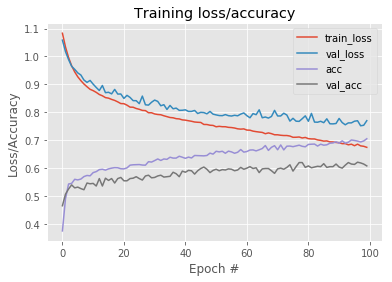

In [28]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,100), H.history["accuracy"], label="acc")
plt.plot(np.arange(0,100), H.history["val_accuracy"], label="val_acc")
plt.title("Training loss/accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [29]:
!ls

10_neural_networks.ipynb		13_saving_and_loading_your_models.ipynb
11_convolutional_neural_networks.ipynb	jemma.png
12_training_your_first_cnn.ipynb	shallownet_weights.hdf5


## Loading your model and inference

In [4]:
# shallownet_load.py
from dlframework.preprocessing import SimplePreprocessor
from dlframework.preprocessing import ImageToArrayPreprocessor
from dlframework.datasets import SimpleDatasetLoader
from keras.models import load_model
import numpy as np
from imutils import paths
import argparse
import matplotlib.pyplot as plt
import cv2

In [5]:
dataset = "../SB_Code/datasets/animals/"
model_path = "shallownet_weights.hdf5"
# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-d","--dataset", required=True,
#                help = "path to input dataset")
# ap.add_argument("-m", "--model", required=True,
#                help = "path to pre-trained model")
# args = vars(ap.parse_args())

# initialize the class labels
classLabels = ["cat", "dog", "panda"]

In [7]:
# grab the list of images in the dataset then randomly sample
# indexes into the image paths list
print("[INFO] sampling images...")
imagePaths = np.array(list(paths.list_images(dataset)))
idxs = np.random.randint(0, len(imagePaths), size=(10,))
imagePaths = imagePaths[idxs]



[INFO] sampling images...


In [8]:
# initialize the image preprocessors
sp = SimplePreprocessor(32, 32)
iap = ImageToArrayPreprocessor()

# load the dataset from disk then scale the raw pixel intensities
# to the range [0, 1]
sdl = SimpleDatasetLoader(preprocessors = [sp, iap])
(data, labels) = sdl.load(imagePaths, verbose=500)
data = data.astype("float")/255.0

In [9]:
# load the pre-trained network
print("[INFO] loading the pre-trained network")
model = load_model(model_path)

In [10]:
print("[INFO] making predictions...")
predictions = model.predict(data,batch_size = 32).argmax(axis=1)


[INFO] making predictions...


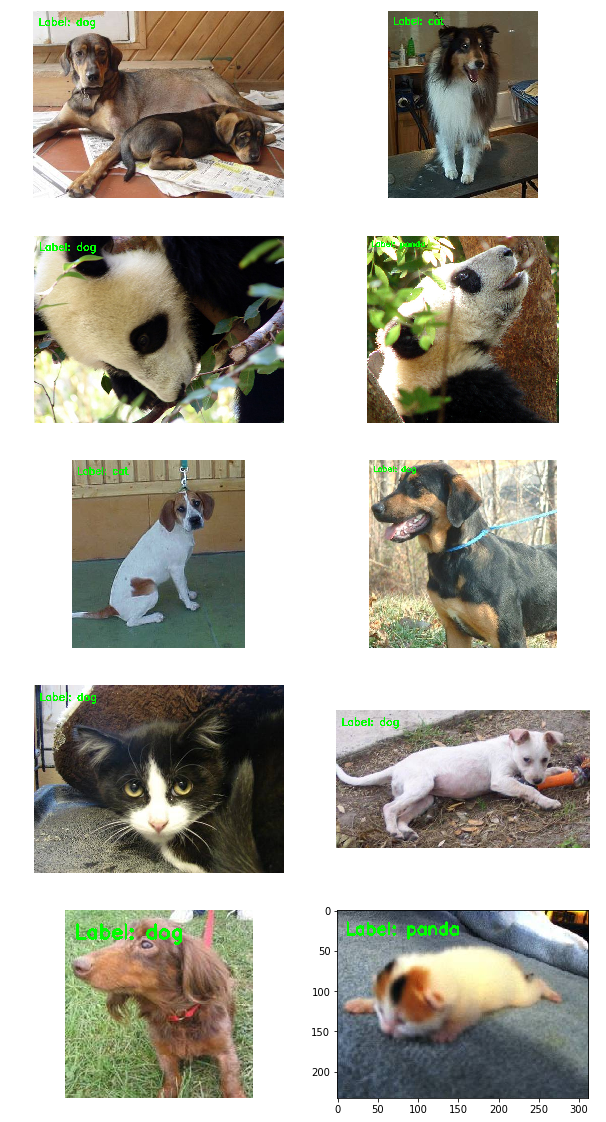

In [21]:
plt.figure(figsize=(10,20))

for (i, imagePath) in enumerate(imagePaths):
    # load the example image, draw the prediction, and display it
    image = cv2.imread(imagePath)
    cv2.putText(image, "Label: {}".format(classLabels[predictions[i]]), (10,30),
               cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.subplot(5, 2, i+1)
    plt.imshow(image)
plt.show()